# CROSS-ENTROPY LOSS
Consists of two parts namely: SOFTMAX FUNCTION and LOG LIKELYHOOD.
We first take the softmax function and then log likelyhood function to form it

## THE SOFTMAX FUNCTION

Softmax is an activation function similar to sigmoid such that it ensures that all activations are all between 0 and 1 and they all sum to one

In [2]:
from fastai.vision.all import *

In [5]:
'''
We can Get started using a binary problem before we dive deeper into problems with more categories

Lets assume we are having six images having two categories in which to classify them. We will
use random numbers with a standard deviation of 2 (We multiply the randn by 2) 

Below are pairs of activations that indicate the relative confidence of the inputs being a 3 vs
being a 7. The activation values don't really matter weather they are high or low, what really 
matters is which of the two is higher and by how much'''

activations = torch.randn((6,2))*2
activations

tensor([[ 2.3771, -2.8988],
        [-2.6314,  0.1466],
        [ 1.1035,  0.5041],
        [-3.1179, -2.0637],
        [ 3.7481, -1.0225],
        [-2.2668,  1.5217]])

In [6]:
'''We cannot get the sigmoid of the pairs since they don't add up to 1 within those specific rows
'''
sig_activations = torch.sigmoid(activations)
sig_activations

tensor([[0.9151, 0.0522],
        [0.0671, 0.5366],
        [0.7509, 0.6234],
        [0.0424, 0.1127],
        [0.9770, 0.2646],
        [0.0939, 0.8208]])

In [12]:
'''To use sigmoid within the pair, we take the difference between their confidence value(activations)
- Difference between confidence that it belongs to 3s, column 1 and belonging to 7s, column 2 
and apply sigmoid on the result

The results in the column below are activations representing the confidence that the inputs are 
categorized as 3s
Therefore, confidence that they belong to 7s is calculated by subtracting the below values from one

The above only returns the activation of one category'''

(activations[:,0]-activations[:,1]).sigmoid()


tensor([0.9949, 0.0585, 0.6455, 0.2584, 0.9916, 0.0221])

In [14]:
'''Now we need to get a function that does the above but for more than two categories. This is 
where softmax comes in!

Using softmax on a binary problem which results in the activations of both the categories unlike
sigmoid which returns activation of only one category'''

#Checking that softmax returns activations on 3s in the first column as above and 1- 3s activations 
#in the second column

sm_activations = torch.softmax(activations, dim=1)
sm_activations


tensor([[0.9949, 0.0051],
        [0.0585, 0.9415],
        [0.6455, 0.3545],
        [0.2584, 0.7416],
        [0.9916, 0.0084],
        [0.0221, 0.9779]])

In [15]:
'''Softmax is therefore a multi-category equivalent of sigmoid such that it can be used anytime
we have more than two categories and the probabilty of all the categories must add up to one'''


'Softmax is therefore a multi-category equivalent of sigmoid such that it can be used anytime\nwe have more than two categories and the probabilty of all the categories must add up to one'

In [17]:
#Softmax function definition
'''
In the softmax function, taking the exponent ensures that all the numbers are positive
Dividing by the sum ensures that we are going to have a bunch of numbers that add up to one'''

def softmax(x):
    return exp(x) / exp(x).sum(dim=1, keepdim=True)





## LOG LIKELYHOOD


In [18]:
'''When we treat a binary problem as a general classification problem, we get two columns equivalent
to input and 1-input similar to the mnist_loss function as shown below'''

def mnist_loss(inputs, targets):
 inputs = inputs.sigmoid()
 return torch.where(targets==1, 1-inputs, inputs).mean()


In [19]:
'''Therefore all we need to do is select from the appropriate column to get the appropriate loss
value depending on the target'''

#Randomly assigning target output from which the loss can be calculated

target = tensor([0,1,0,1,1,0])


In [20]:
#Softmax activations
sm_activations

tensor([[0.9949, 0.0051],
        [0.0585, 0.9415],
        [0.6455, 0.3545],
        [0.2584, 0.7416],
        [0.9916, 0.0084],
        [0.0221, 0.9779]])

In [23]:
'''Using items of 'target' we can use that to select the appropriate column of the activations
'sm_activations' using tensor indexing as shown below '''

idx = range(6)
sm_activations[idx, target]

tensor([0.9949, 0.9415, 0.6455, 0.7416, 0.0084, 0.0221])

In [25]:
'''Pytorch has a function that does the same thing as the 'sm_activations[idx, target]' called
nll_loss - with nll standing for negative log likelyhood. It however takes a negative since when
log is performed afterwards it results in negative numbers

The 'target' allows access of values in columns that correspond to the target i.e 0 - First column,
1 - second column

Look at the figure in the cell below
'''

-sm_activations[idx, target]

tensor([-0.9949, -0.9415, -0.6455, -0.7416, -0.0084, -0.0221])

Just an Example of how choice of the column is done

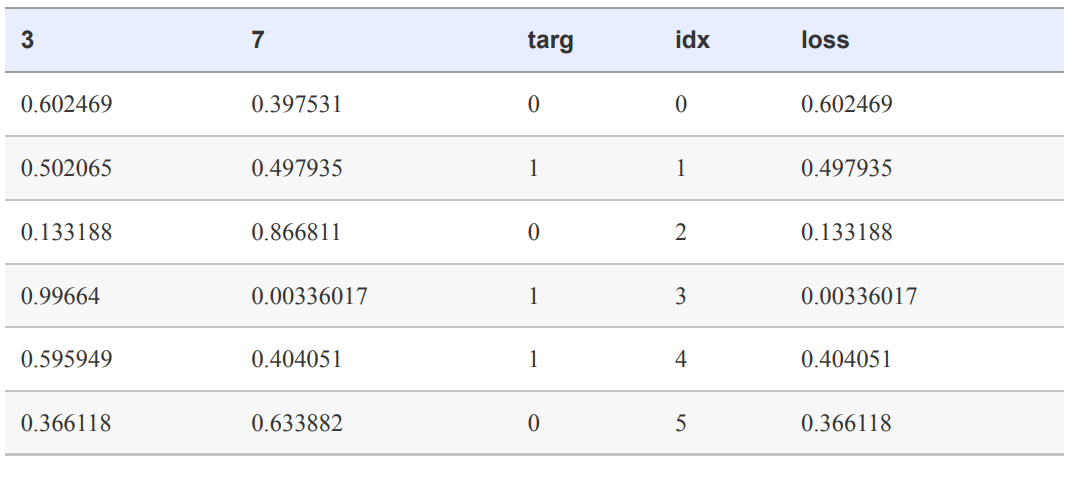


In [27]:
'''Despite the name, this function doesn't take the log yet, It just works like 
"-sm_activations[idx, target]"
'''
F.nll_loss(sm_activations, target, reduction='none')


tensor([-0.9949, -0.9415, -0.6455, -0.7416, -0.0084, -0.0221])

## Taking the log

In [ ]:
'''By taking the log, we transform our numbers between 0 and 1 to be between -infinity to infinity.
This helps with distinctly separating predictions that appear to be too close together while they
are in the probabilty state.

Ex. Two predictions in probability i.e 0.77 and 0.777 are too close together and the model might
not care about that tiny difference. However 0.777 is 10 times more confident than 0.77 hence 
the need to elaborately showcase that diffence to make the function a little better

nll loss doesn't really perform the log at all.It assumes you already did that! 

Pytorch's log_softmax combines log and softmax in an accurate and fast way. nll is designed to be 
used after log_softmax

In pytorch the above are available as nn.CrossEntropyLoss which does log_softmax first then
nll loss afterwards'''


In [33]:
loss_func = nn.CrossEntropyLoss(reduction="none")
loss_func(activations, target)

#By default, it takes the mean of all the loss items. You can use reduction = "None" to disable it

tensor([0.0051, 0.0603, 0.4377, 0.2990, 4.7790, 3.8108])

In [ ]:
'''NOTE:  The gradient of the Cross-Entropy loss i.e CrossEntropy(activation, target) is 
equivalent to softmax(activation) - target'''